In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from wrangle import load_dataset, encode_categorical_data, keep_selected_columns
from explore import split_data_and_create_baseline, univariate_analysis,bivariate_analysis,multivariate_analysis
from model import train_and_evaluate_models, evaluate_best_model
from explore import calculate_t_test

ImportError: cannot import name 'calculate_t_test' from 'explore' (/Users/lordvoldemort/codeup-data-science/Individual-Project/explore.py)

# Acquire & Prep

In [4]:
# Acquiring data from kaggle via API request
df =load_dataset()

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [5]:

df = encode_categorical_data(df)

In [6]:
# Keep 4 four columns I hypothesize to be the key driver
df = keep_selected_columns(df)

In [8]:
# display new dataframe 
# no null values
# feature engineering a new column was not necessary
# all Datatypes are appropriate
df

,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.380,184.60,0.2654
1,1,0.07017,24.990,158.80,0.1860
2,1,0.12790,23.570,152.50,0.2430
3,1,0.10520,14.910,98.87,0.2575
4,1,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,1,0.13890,25.450,166.10,0.2216
565,1,0.09791,23.690,155.00,0.1628
566,1,0.05302,18.980,126.70,0.1418
567,1,0.15200,25.740,184.60,0.2650


# EDA

In [6]:
# Select features and target variable
X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']].values
Y = df['diagnosis'].values

In [7]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test, accuracy = split_data_and_create_baseline(X, Y)


In [20]:
# all features chosen are those with a correlation coefficient of over .75

# ttest
selected_features = ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']
target_variable = 'diagnosis'
significance_level = 0.05

### Hypothesis

Hypothesis 1: Concave points_mean have a positive relationship with diagnosis
* Null: Concave points_mean does not have a relationship with diagnosis
* Alternative: concave points_mean have a negative relationship with diagnosis

In [23]:
calculate_t_test(df, ['concave points_mean'], target_variable)


T-Test Results:
T-Test between concave points_mean and diagnosis:
T-Statistic: -29.3543
P-value: 0.0000

T-Test between concave points_mean and diagnosis is statistically significant.


Hypothesis 1: radius_worst have a positive relationship with diagnosis
* Null: radius_worst does not have a relationship with diagnosis
* Alternative: radius_worst have a negative relationship with diagnosis

In [22]:
calculate_t_test(df, ['radius_worst'], target_variable)


T-Test Results:
T-Test between radius_worst and diagnosis:
T-Statistic: -29.3391
P-value: 0.0000

T-Test between radius_worst and diagnosis is statistically significant.


Hypothesis 1: perimeter_worst have a positive relationship with diagnosis
* Null: perimeter_worst does not have a relationship with diagnosis
* Alternative: perimeter_worst have a negative relationship with diagnosis

In [26]:
calculate_t_test(df, ['perimeter_worst'], target_variable)


T-Test Results:
T-Test between perimeter_worst and diagnosis:
T-Statistic: -29.9657
P-value: 0.0000

T-Test between perimeter_worst and diagnosis is statistically significant.


Hypothesis 1: Concave points_worst have a positive relationship with diagnosis
* Null: concave points_worst does not have a relationship with diagnosis
* Alternative: concave points_worst have a negative relationship with diagnosis

In [25]:
calculate_t_test(df, ['concave points_worst'], target_variable)


T-Test Results:
T-Test between concave points_worst and diagnosis:
T-Statistic: -31.0546
P-value: 0.0000

T-Test between concave points_worst and diagnosis is statistically significant.


### EDA Takeaways:

* concave points_mean have a significant correlation with diagnosis
* radius_worst have a significant correlation with diagnosis
* perimeter_worst have a significant correlation with diagnosis
* concave points_worst have a significant correlation with diagnosis

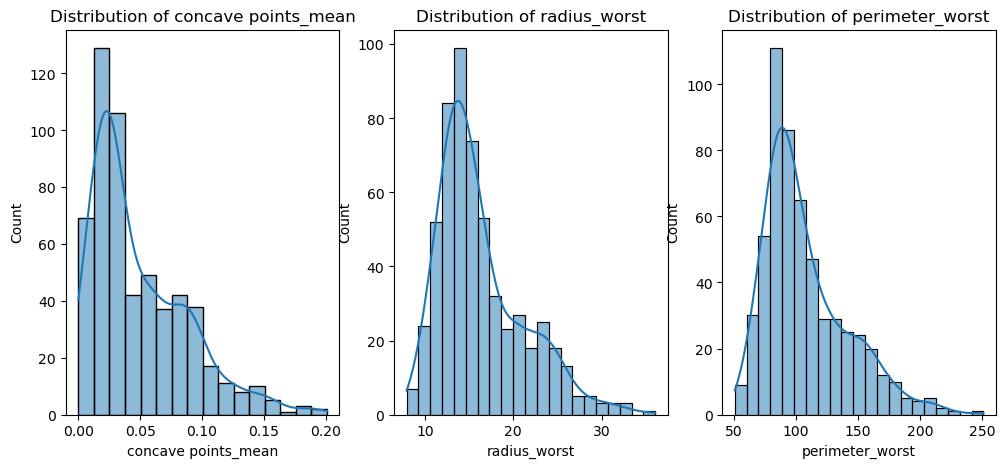

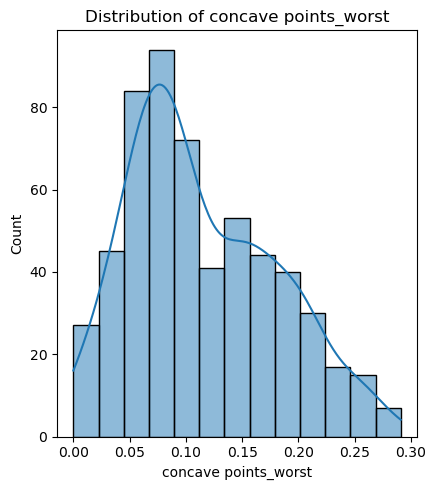

In [9]:
univariate_analysis(df)

Data is skewed to the Right

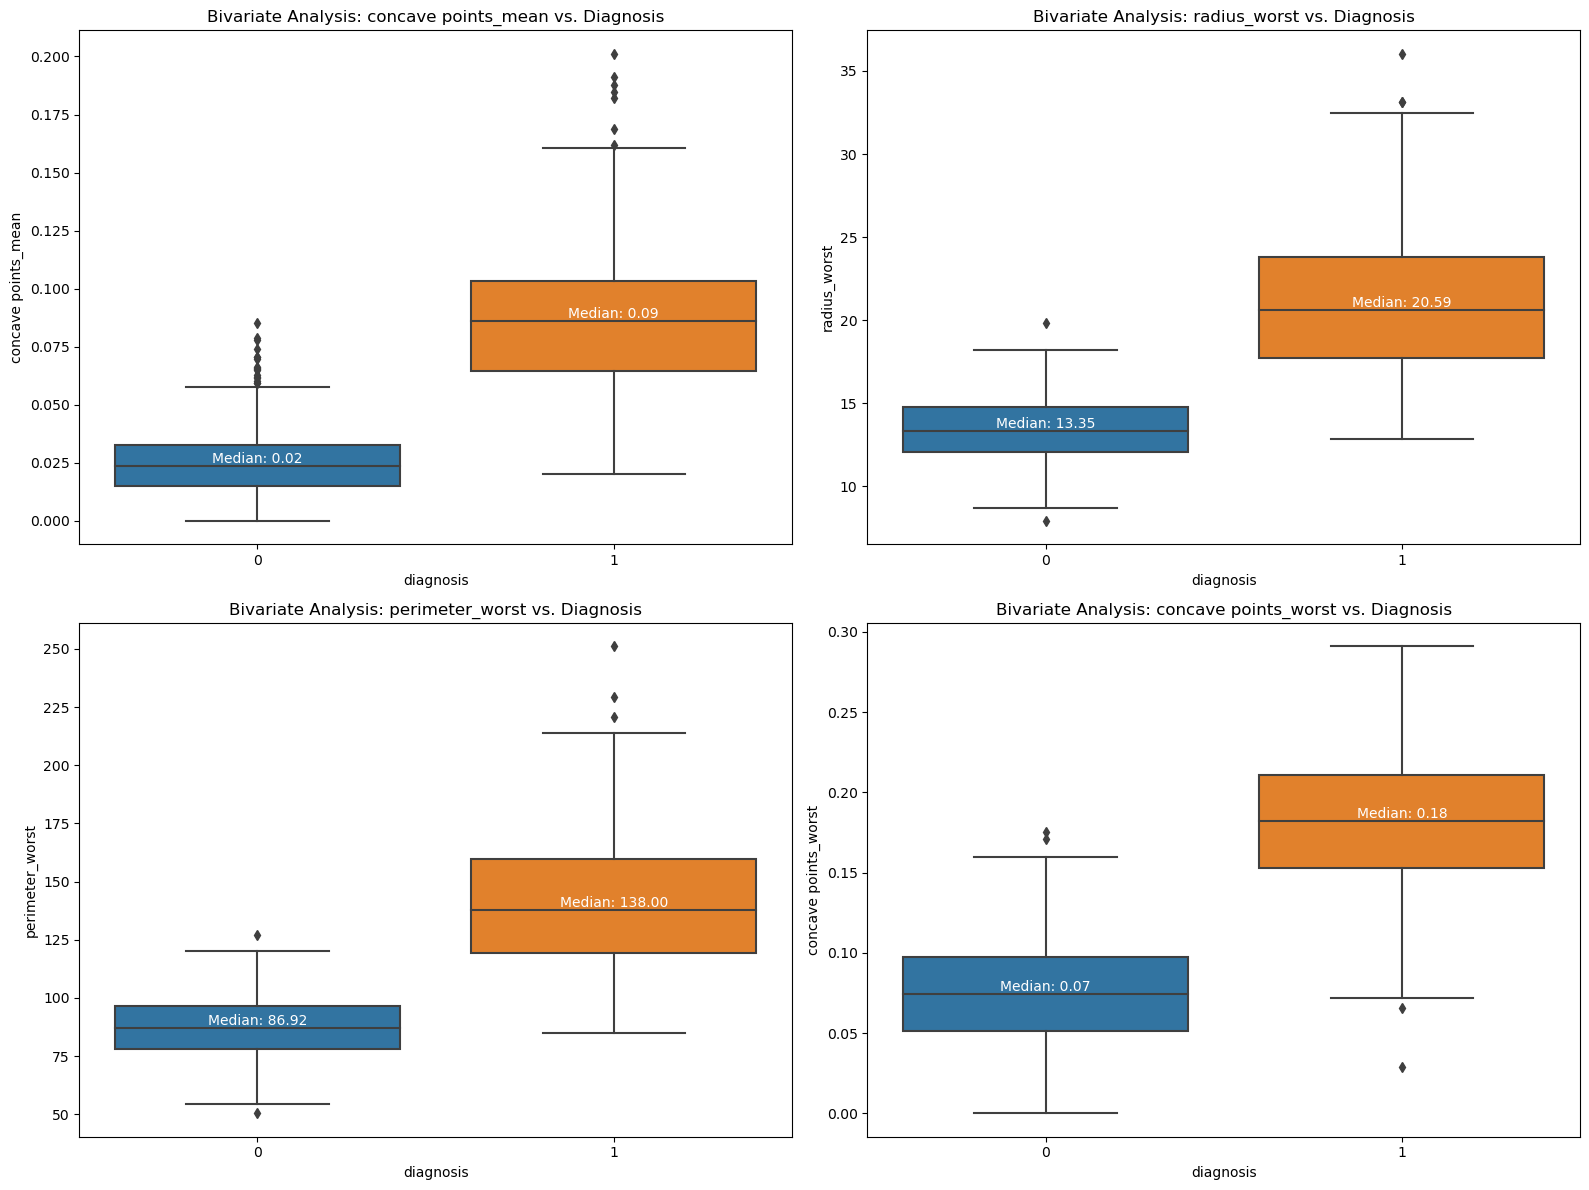

In [10]:
bivariate_analysis(df)

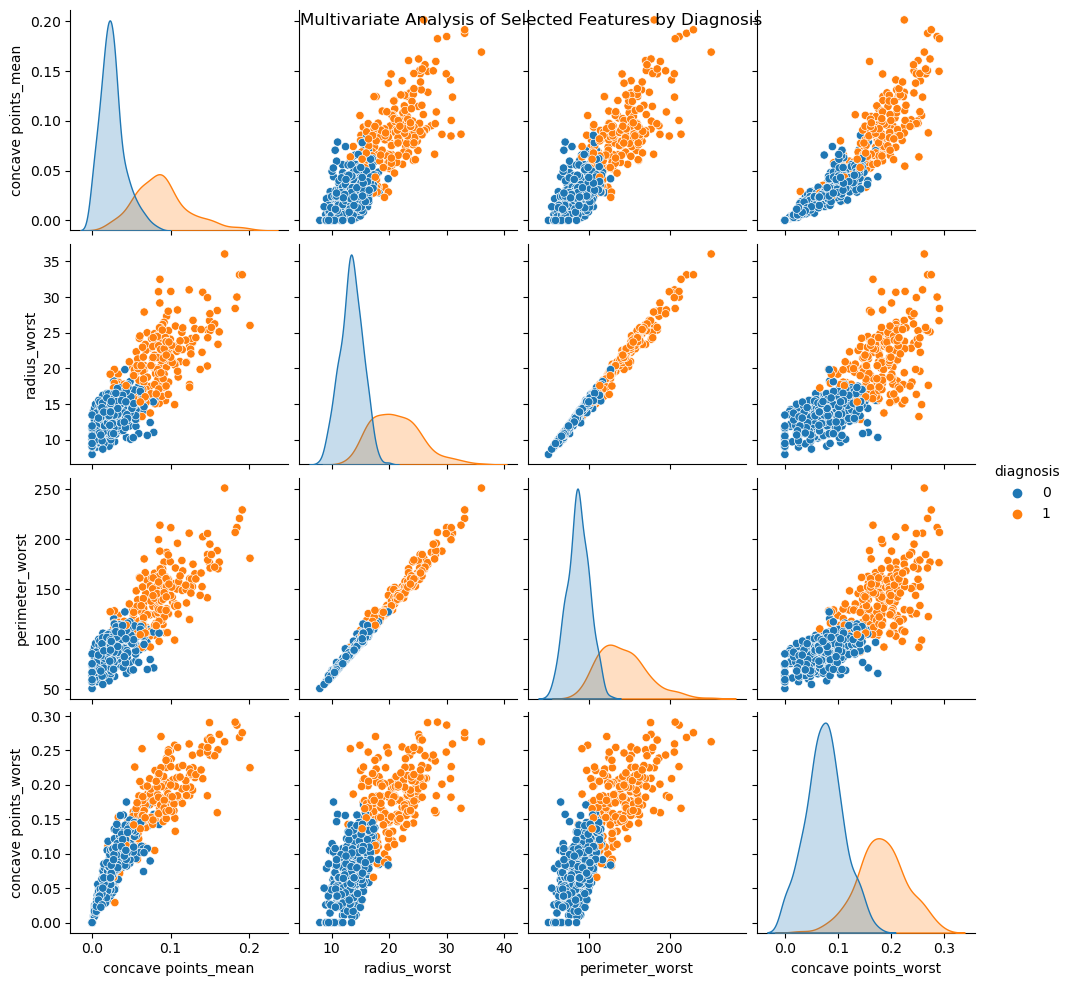

In [11]:
multivariate_analysis(df)

In [ ]:
Each variables are shown to have relationship with one another in a positive pattern

# Model

In [12]:
# Train and evaluate models on the validation set using five different ML algorithms; 
trained_models = train_and_evaluate_models(X_train, Y_train, X_validation, Y_validation)


Model [0] Train Accuracy: 0.94
Model [1] Train Accuracy: 1.00
Model [2] Train Accuracy: 0.99
Model [3] Train Accuracy: 0.94
Model [4] Train Accuracy: 0.98
Model [0] Validation Accuracy: 0.98
Model [1] Validation Accuracy: 0.95
Model [2] Validation Accuracy: 0.93
Model [3] Validation Accuracy: 0.94
Model [4] Validation Accuracy: 0.94


In [19]:
#The best came out to be logistic regression, so we use that model for the unseen data
evaluate_best_model(trained_models, X_test, Y_test)


Test Accuracy: 0.95
Predictions saved to predictions.csv


### Conclusions:

* concave points_mean is a key driver of diagnosis
* radius_worst is a key driver of diagnosis
* perimeter_worst is a key driver of diagnosis
* concave points_worst is a key driver of diagnosis